In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB

In [4]:
#Read GPS features
gpsTrain = pd.read_csv("../Data/GPS_TrainingData_Mar03_2021.csv")
gpsTest = pd.read_csv("../Data/GPS_TestData_Mar03_2021.csv")

In [5]:
#Convert string columns to numbers
cleanup_chars = {"timeOfDay":     {"Morning Peak": 1, "Afternoon": 2, "Evening Peak": 3, "Night": 4},
                "season": {"Spring": 1, "Summer": 2, "Fall": 3, "Winter": 4},
                "city": {"Montreal": 1, "St. Johns": 2, "Vancouver": 3}}

In [6]:
gpsTrain = gpsTrain.replace(cleanup_chars).fillna(0)
gpsTrain.head()

,Unnamed: 0,dist,abs_ngl,rel_ngl,speed,height,timeOfDay,season,city,mode
0,1,0.000000,0.499955,0.500000,0.000000,0.557928,3.0,3,2,Active
1,2,0.000000,0.499955,0.500000,0.000000,0.557928,3.0,3,2,Active
2,4,0.000021,0.423270,0.092596,0.001170,0.561712,3.0,3,2,Active
3,5,0.000021,0.547883,0.624602,0.001142,0.561659,3.0,3,2,Active
4,6,0.001480,0.498559,0.450681,0.000273,0.563016,3.0,3,2,Active


In [7]:
gpsTest = gpsTest.replace(cleanup_chars).fillna(0)
gpsTest.head()

,Unnamed: 0,dist,abs_ngl,rel_ngl,speed,height,timeOfDay,season,city,mode
0,3,0.044872,0.680526,0.210932,0.008290,0.557930,3.0,3,2,Active
1,14,0.000040,0.630449,0.593624,0.001105,0.596168,3.0,3,2,Active
2,16,0.000106,0.100725,0.981177,0.000020,0.596180,3.0,3,2,Active
3,20,0.000049,0.097701,0.967301,0.000268,0.596172,3.0,3,2,Active
4,26,0.000180,0.080170,0.003121,0.001648,0.596119,3.0,3,2,Active


In [8]:
#Read GIS features
gisTrain = pd.read_csv("../Data/GIS_TrainingData_Mar03_2021.csv")
gisTest = pd.read_csv("../Data/GIS_TestData_Mar03_2021.csv")

In [9]:
gisTrain = gisTrain.replace(cleanup_chars).fillna(0)
gisTrain.head()

,Unnamed: 0,dist_bus,dist_sub,dist_green,dist_shore,dist_res,dist_comm,dist_bike,timeOfDay,season,city,mode
0,1,0.001083,0.0,0.003260,0.065925,0.016467,0.001939,0.008105,3.0,3,2,Active
1,2,0.001083,0.0,0.003260,0.065925,0.016467,0.001939,0.008105,3.0,3,2,Active
2,4,0.001191,0.0,0.003553,0.065775,0.016595,0.002146,0.007801,3.0,3,2,Active
3,5,0.001198,0.0,0.003565,0.065770,0.016599,0.002153,0.007789,3.0,3,2,Active
4,8,0.001605,0.0,0.004188,0.065312,0.017024,0.002756,0.007217,3.0,3,2,Active


In [10]:
gisTest = gisTest.replace(cleanup_chars).fillna(0)
gisTest.head()

,Unnamed: 0,dist_bus,dist_sub,dist_green,dist_shore,dist_res,dist_comm,dist_bike,timeOfDay,season,city,mode
0,3,0.001083,0.0,0.003260,0.065925,0.016467,0.001939,0.008105,3.0,3,2,Active
1,6,0.001198,0.0,0.003571,0.065760,0.016608,0.002165,0.007783,3.0,3,2,Active
2,7,0.001605,0.0,0.004188,0.065312,0.017024,0.002756,0.007217,3.0,3,2,Active
3,11,0.001638,0.0,0.004234,0.065247,0.017086,0.002799,0.007186,3.0,3,2,Active
4,20,0.001659,0.0,0.004261,0.065204,0.017126,0.002829,0.007170,3.0,3,2,Active


In [11]:
#Read all features
allTrain = pd.read_csv("../Data/GPS_GIS_TrainingData_Mar03_2021.csv")
allTest = pd.read_csv("../Data/GPS_GIS_TestData_Mar03_2021.csv")

In [12]:
allTrain = allTrain.replace(cleanup_chars).fillna(0)
allTrain.head()

,Unnamed: 0,X,dist,abs_ngl,rel_ngl,speed,height,dist_bus,dist_sub,dist_green,dist_shore,dist_res,dist_comm,dist_bike,timeOfDay,season,city,mode
0,1,1,0.000000e+00,0.499955,0.500000,0.000000,0.557928,0.001083,0.0,0.003260,0.065925,0.016467,0.001939,0.008105,3.0,3,2,Active
1,2,2,0.000000e+00,0.499955,0.500000,0.000000,0.557928,0.001083,0.0,0.003260,0.065925,0.016467,0.001939,0.008105,3.0,3,2,Active
2,3,3,4.487168e-02,0.680526,0.210932,0.008290,0.557930,0.001083,0.0,0.003260,0.065925,0.016467,0.001939,0.008105,3.0,3,2,Active
3,7,7,1.817605e-03,0.969620,0.398452,0.000341,0.596180,0.001605,0.0,0.004188,0.065312,0.017024,0.002756,0.007217,3.0,3,2,Active
4,8,8,1.611802e-07,0.499955,0.500000,0.000002,0.596180,0.001605,0.0,0.004188,0.065312,0.017024,0.002756,0.007217,3.0,3,2,Active


In [13]:
allTest = allTest.replace(cleanup_chars).fillna(0)
allTest.head()

,Unnamed: 0,X,dist,abs_ngl,rel_ngl,speed,height,dist_bus,dist_sub,dist_green,dist_shore,dist_res,dist_comm,dist_bike,timeOfDay,season,city,mode
0,4,4,0.000021,0.423270,0.092596,0.001170,0.561712,0.001191,0.0,0.003553,0.065775,0.016595,0.002146,0.007801,3.0,3,2,Active
1,5,5,0.000021,0.547883,0.624602,0.001142,0.561659,0.001198,0.0,0.003565,0.065770,0.016599,0.002153,0.007789,3.0,3,2,Active
2,6,6,0.001480,0.498559,0.450681,0.000273,0.563016,0.001198,0.0,0.003571,0.065760,0.016608,0.002165,0.007783,3.0,3,2,Active
3,15,15,0.000146,0.117978,0.531355,0.004008,0.596180,0.001650,0.0,0.004251,0.065209,0.017122,0.002828,0.007178,3.0,3,2,Active
4,16,16,0.000106,0.100725,0.981177,0.000020,0.596180,0.001650,0.0,0.004252,0.065203,0.017127,0.002833,0.007179,3.0,3,2,Active


In [14]:
#Separate predictor variable and independent variables from training data
X_gps = gpsTrain.loc[:, ~gpsTrain.columns.isin(['mode', 'Unnamed: 0'])]
X_gis = gisTrain.loc[:, ~gisTrain.columns.isin(['mode', 'Unnamed: 0'])]
X_all = allTrain.loc[:, ~allTrain.columns.isin(['mode', 'Unnamed: 0','X'])]

y_gps = gpsTrain.loc[:,'mode']
y_gis = gisTrain.loc[:,'mode']
y_all = allTrain.loc[:,'mode']

In [15]:
#Separate predictor variable and independent variables from test data
X1_gps = gpsTest.loc[:, ~gpsTest.columns.isin(['mode', 'Unnamed: 0'])]
X1_gis = gisTest.loc[:, ~gisTest.columns.isin(['mode', 'Unnamed: 0'])]
X1_all = allTest.loc[:, ~allTest.columns.isin(['mode', 'Unnamed: 0','X'])]

y1_gps = gpsTest.loc[:,'mode']
y1_gis = gisTest.loc[:,'mode']
y1_all = allTest.loc[:,'mode']

In [72]:
X1_all.shape

(967996, 15)

In [16]:
#Create models to fit the training data
RF = RandomForestClassifier(max_depth=20, random_state=0)
XGB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=20, random_state=0)
SVM = LinearSVC(random_state=0, tol=1e-5)
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

In [21]:
#Perform K-fold cross-validation and calculate scores for GPS features
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=10)
RF_scores_gps = cross_val_score(RF, X_gps, y_gps, scoring='accuracy', cv=k_fold, n_jobs=-1)
XGB_scores_gps = cross_val_score(XGB, X_gps, y_gps, scoring='accuracy', cv=k_fold, n_jobs=-1)
SVM_scores_gps = cross_val_score(SVM, X_gps, y_gps, scoring='accuracy', cv=k_fold, n_jobs=-1)
MLP_scores_gps = cross_val_score(MLP, X_gps, y_gps, scoring='accuracy', cv=k_fold, n_jobs=-1)

# report performance
import numpy as np
print('Random Forest Model Accuracy (GPS Only): %.3f (%.3f)' % (np.mean(RF_scores_gps), np.std(RF_scores_gps)))
print('Gradient Boost Model Accuracy (GPS Only): %.3f (%.3f)' % (np.mean(XGB_scores_gps), np.std(XGB_scores_gps)))
print('Support Vector Machine Model Accuracy (GPS Only): %.3f (%.3f)' % (np.mean(SVM_scores_gps), np.std(SVM_scores_gps)))
print('Multilayer Perceptron Model Accuracy (GPS Only): %.3f (%.3f)' % (np.mean(MLP_scores_gps), np.std(MLP_scores_gps)))

Random Forest Model Accuracy (GPS Only): 0.740 (0.025)
Gradient Boost Model Accuracy (GPS Only): 0.694 (0.021)
Support Vector Machine Model Accuracy (GPS Only): 0.616 (0.058)
Multilayer Perceptron Model Accuracy (GPS Only): 0.585 (0.060)


In [31]:
import pickle
# save the model to disk
pickle.dump(RF_scores_gps, open('../Results/RF_gps_model.sav', 'wb'))
pickle.dump(XGB_scores_gps, open('../Results/XGB_gps_model.sav', 'wb'))
pickle.dump(SVM_scores_gps, open('../Results/SVM_gps_model.sav', 'wb'))
pickle.dump(MLP_scores_gps, open('../Results/MLP_gps_model.sav', 'wb'))

In [23]:
#Perform K-fold cross-validation and calculate scores for GIS features
RF_scores_gis = cross_val_score(RF, X_gis, y_gis, scoring='accuracy', cv=k_fold, n_jobs=-1)
XGB_scores_gis = cross_val_score(XGB, X_gis, y_gis, scoring='accuracy', cv=k_fold, n_jobs=-1)
SVM_scores_gis = cross_val_score(SVM, X_gis, y_gis, scoring='accuracy', cv=k_fold, n_jobs=-1)
MLP_scores_gis = cross_val_score(MLP, X_gis, y_gis, scoring='accuracy', cv=k_fold, n_jobs=-1)

# report performance
print('Random Forest Model Accuracy (GIS Only): %.3f (%.3f)' % (np.mean(RF_scores_gis), np.std(RF_scores_gis)))
print('Gradient Boost Model Accuracy (GIS Only): %.3f (%.3f)' % (np.mean(XGB_scores_gis), np.std(XGB_scores_gis)))
print('Support Vector Machine Model Accuracy (GIS Only): %.3f (%.3f)' % (np.mean(SVM_scores_gis), np.std(SVM_scores_gis)))
print('Multilayer Perceptron Model Accuracy (GIS Only): %.3f (%.3f)' % (np.mean(MLP_scores_gis), np.std(MLP_scores_gis)))

Random Forest Model Accuracy (GIS Only): 0.752 (0.013)
Gradient Boost Model Accuracy (GIS Only): 0.709 (0.012)
Support Vector Machine Model Accuracy (GIS Only): 0.585 (0.060)
Multilayer Perceptron Model Accuracy (GIS Only): 0.585 (0.060)


In [28]:
pickle.dump(MLP_scores_gis, open('../ResultsMLP_gis_model.sav', 'wb'))

In [29]:
import pickle
# save the model to disk
pickle.dump(RF_scores_gis, open('../Results/RF_gis_model.sav', 'wb'))
pickle.dump(XGB_scores_gis, open('../Results/XGB_gis_model.sav', 'wb'))
pickle.dump(SVM_scores_gis, open('../Results/SVM_gis_model.sav', 'wb'))
pickle.dump(MLP_scores_gis, open('../Results/MLP_gis_model.sav', 'wb'))

In [17]:
#Perform K-fold cross-validation and calculate scores for both GPS and GIS features combined
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=10)
RF_scores_all = cross_val_score(RF, X_all, y_all, scoring='accuracy', cv=k_fold, n_jobs=-1)
XGB_scores_all = cross_val_score(XGB, X_all, y_all, scoring='accuracy', cv=k_fold, n_jobs=-1)
SVM_scores_all = cross_val_score(SVM, X_all, y_all, scoring='accuracy', cv=k_fold, n_jobs=-1)
MLP_scores_all = cross_val_score(MLP, X_all, y_all, scoring='accuracy', cv=k_fold, n_jobs=-1)

# report performance
print('Random Forest Model Accuracy (GPS + GIS): %.3f (%.3f)' % (np.mean(RF_scores_all), np.std(RF_scores_all)))
print('Gradient Boost Model Accuracy (GPS + GIS): %.3f (%.3f)' % (np.mean(XGB_scores_all), np.std(XGB_scores_all)))
print('Support Vector Machine Model Accuracy (GPS + GIS): %.3f (%.3f)' % (np.mean(SVM_scores_all), np.std(SVM_scores_all)))
print('Multilayer Perceptron Model Accuracy (GPS + GIS): %.3f (%.3f)' % (np.mean(MLP_scores_all), np.std(MLP_scores_all)))

Random Forest Model Accuracy (GPS + GIS): 0.800 (0.016)
Gradient Boost Model Accuracy (GPS + GIS): 0.793 (0.013)
Support Vector Machine Model Accuracy (GPS + GIS): 0.648 (0.055)
Multilayer Perceptron Model Accuracy (GPS + GIS): 0.664 (0.046)


In [30]:
import pickle
# save the model to disk
pickle.dump(RF_scores_all, open('../Results/RF_all_model.sav', 'wb'))
pickle.dump(XGB_scores_all, open('../Results/XGB_all_model.sav', 'wb'))
pickle.dump(SVM_scores_all, open('../Results/SVM_all_model.sav', 'wb'))
pickle.dump(MLP_scores_all, open('../Results/MLP_all_model.sav', 'wb'))


# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))

In [34]:
#Run additional models to compare accuracy
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
#ADB = AdaBoostClassifier(n_estimators=100, random_state=0)
#CART = DecisionTreeClassifier(random_state=0, max_depth=2)
#ADB_scores_gps = cross_val_score(ADB, X_gps, y_gps, scoring='accuracy', cv=k_fold, n_jobs=-1)
#ADB_score_gis = cross_val_score(ADB, X_gis, y_gis, scoring='accuracy', cv=k_fold, n_jobs=-1)
#ADB_scores_all = cross_val_score(ADB, X_all, y_all, scoring='accuracy', cv=k_fold, n_jobs=-1)
#CART_scores_gps = cross_val_score(CART, X_gps, y_gps, scoring='accuracy', cv=k_fold, n_jobs=-1)
#CART_scores_gis = cross_val_score(CART, X_gis, y_gis, scoring='accuracy', cv=k_fold, n_jobs=-1)
#CART_scores_all =cross_val_score(CART, X_all, y_all, scoring='accuracy', cv=k_fold, n_jobs=-1)

# report performance
print('AdaBoost Model Accuracy (GPS only): %.3f (%.3f)' % (np.mean(ADB_scores_gps), np.std(ADB_scores_gps)))
print('AdaBoost Model Accuracy (GIS only): %.3f (%.3f)' % (np.mean(ADB_score_gis), np.std(ADB_score_gis)))
print('AdaBoost Model Accuracy (GPS + GIS): %.3f (%.3f)' % (np.mean(ADB_scores_all), np.std(ADB_scores_all)))

print('Decision Tree Model Accuracy (GPS only): %.3f (%.3f)' % (np.mean(CART_scores_gps), np.std(CART_scores_gps)))
print('Decision Tree Model Accuracy (GIS only): %.3f (%.3f)' % (np.mean(CART_scores_gis), np.std(CART_scores_gis)))
print('Decision Tree Model Accuracy (GPS + GIS): %.3f (%.3f)' % (np.mean(CART_scores_all), np.std(CART_scores_all)))

AdaBoost Model Accuracy (GPS only): 0.723 (0.026)
AdaBoost Model Accuracy (GIS only): 0.640 (0.026)
AdaBoost Model Accuracy (GPS + GIS): 0.742 (0.023)
Decision Tree Model Accuracy (GPS only): 0.708 (0.025)
Decision Tree Model Accuracy (GIS only): 0.611 (0.017)
Decision Tree Model Accuracy (GPS + GIS): 0.714 (0.032)


In [36]:
# save the model to disk
pickle.dump(ADB_scores_gps, open('../Results/ADB_gps_model.sav', 'wb'))
pickle.dump(ADB_score_gis, open('../Results/ADB_gis_model.sav', 'wb'))
pickle.dump(ADB_scores_all, open('../Results/ADB_all_model.sav', 'wb'))

pickle.dump(CART_scores_gps, open('../Results/CART_gps_model.sav', 'wb'))
pickle.dump(CART_scores_gis, open('../Results/CART_gis_model.sav', 'wb'))
pickle.dump(CART_scores_all, open('../Results/CART_all_model.sav', 'wb'))

In [ ]:
#Precision-Recall curves: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
#Classification Metrics plots:  https://stackoverflow.com/questions/28200786/how-to-plot-scikit-learn-classification-report

In [37]:
RF_gps = RF.fit(X_gps,y_gps)
RF_gis = RF.fit(X_gis,y_gis)
RF_all = RF.fit(X_all,y_all)
import pickle
pickle.dump(RF_gps, open('../Results/RF_gps_fitted.sav', 'wb'))
pickle.dump(RF_gis, open('../Results/RF_gis_fitted.sav', 'wb'))
pickle.dump(RF_all, open('../Results/RF_all_fitted.sav', 'wb'))

In [76]:
#Cross-validated predictions
from sklearn.model_selection import cross_val_predict
y_pred_gps = cross_val_predict(RF_gps, X1_gps, y1_gps, cv=10)
y_pred_gis = cross_val_predict(RF_gis, X1_gis, y1_gis, cv=10)
y_pred_all = cross_val_predict(RF_all, X1_all, y1_all, cv=10)

#Create a dataframe with predicted results
y_pred = pd.DataFrame({'RF_GPS_Pred':y_pred_gps, 'RF_GIS_Pred':y_pred_gis, 'RF_Both_Pred':y_pred_all})
print(y_pred.head())
y_pred.to_csv("../Results/RF Predicted Labels all feature sets.csv")

(967996,)

In [83]:
y1_true = pd.DataFrame({'GPS_True':y1_gps, 'GIS_True':y1_gis, 'Both_True':y1_all})
print(y1_true.head())
y1_true.to_csv("../Results/True Labels all feature sets.csv")

  GPS_True GIS_True Both_True
0   Active   Active    Active
1   Active   Active    Active
2   Active   Active    Active
3   Active   Active    Active
4   Active   Active    Active


In [85]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size']= 20
plt.figure(figsize=(25,15))

#Generate confusion matrices
cm_gps = confusion_matrix(y1_gps, y_pred_gps, normalize='true')
cm_gis = confusion_matrix(y1_gis, y_pred_gis, normalize='true')
cm_all = confusion_matrix(y1_all, y_pred_all, normalize='true')

#Display confusion matrices
disp_gps = ConfusionMatrixDisplay(confusion_matrix=cm_gps, display_labels=RF_gps.classes_)
disp_gis = ConfusionMatrixDisplay(confusion_matrix=cm_gis, display_labels=RF_gis.classes_)
disp_all = ConfusionMatrixDisplay(confusion_matrix=cm_all, display_labels=RF_all.classes_)

<Figure size 1800x1080 with 0 Axes>

In [91]:
RF_gps.classes_

array(['Active', 'Private', 'Public'], dtype=object)

Text(0.5, 1.0, 'GPS Features')

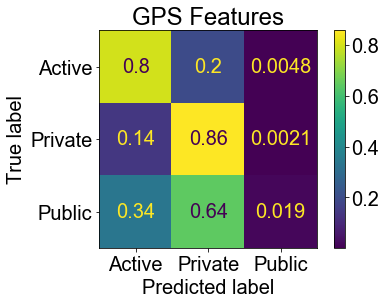

In [88]:
disp_gps.plot() 
plt.title("GPS Features")


Text(0.5, 1.0, 'GIS Features')

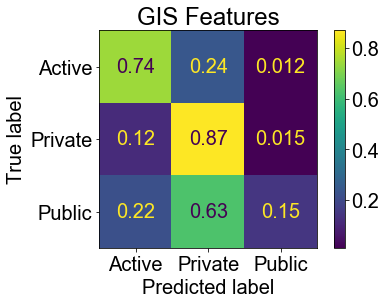

In [89]:
disp_gis.plot()
plt.title("GIS Features")

Text(0.5, 1.0, 'GPS and GIS Features')

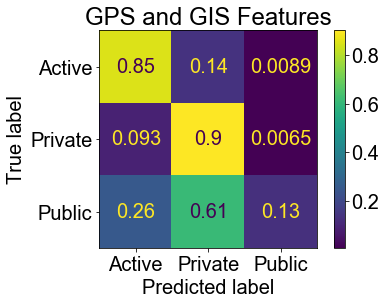

In [90]:
disp_all.plot()
plt.title("GPS and GIS Features")

In [76]:
#Attach predicted labels to the input feature set for each city
data = pd.read_csv("../Results/GPS_GIS_input_features_SJ_VC_MT.csv") 
data.columns

Index(['Unnamed: 0', 'X', 'date', 'id_trip', 'dist', 'abs_ngl', 'rel_ngl',
       'speed', 'height', 'mode', 'dist_bus', 'dist_sub', 'dist_green',
       'dist_shore', 'dist_res', 'dist_comm', 'dist_bike', 'city', 'hour',
       'timeOfDay', 'season'],
      dtype='object')

In [77]:
X = data.loc[:, ~data.columns.isin(['mode', 'Unnamed: 0', 'date','id_trip','X','hour'])]
X = X.replace(cleanup_chars).fillna(0)
y = data['mode']
X.head()

,dist,abs_ngl,rel_ngl,speed,height,dist_bus,dist_sub,dist_green,dist_shore,dist_res,dist_comm,dist_bike,city,timeOfDay,season
0,0.000000,0.000000,0.000000,0.000000,78.748318,65.481080,0.0,189.409101,3830.337970,1027.874013,121.058003,469.424681,2,3.0,3
1,0.000000,0.000000,0.000000,0.000000,78.748745,65.481080,0.0,189.409101,3830.337970,1027.874013,121.058003,469.424681,2,3.0,3
2,0.015284,1.134459,-1.816271,0.000051,78.750210,65.481080,0.0,189.409101,3830.337970,1027.874013,121.058003,469.424681,2,3.0,3
3,0.000007,-0.481780,-2.559797,0.000007,82.334035,72.060463,0.0,206.418379,3821.609834,1035.869067,133.957241,451.808884,2,3.0,3
4,0.000007,0.301116,0.782896,0.000007,82.284539,72.460207,0.0,207.085366,3821.356321,1036.103697,134.412241,451.138429,2,3.0,3


In [78]:
X.shape

(3295827, 15)

In [79]:
from sklearn import preprocessing
X_val = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X_val)
Xnorm = pd.DataFrame(X_scaled)

In [81]:
Xnorm.shape

(3295827, 15)

In [91]:
from sklearn.model_selection import cross_val_predict
data['modes_pred'] = cross_val_predict(RF_all, Xnorm, y, cv=10)
data.head()

,Unnamed: 0,X,date,id_trip,dist,abs_ngl,rel_ngl,speed,height,mode,...,dist_green,dist_shore,dist_res,dist_comm,dist_bike,city,hour,timeOfDay,season,modes_pred
0,1,1,2011-10-20 17:22:17,3192,0.000000,0.000000,0.000000,0.000000,78.748318,Active,...,189.409101,3830.337970,1027.874013,121.058003,469.424681,St. Johns,17,Evening Peak,Fall,Active
1,2,2,2011-10-20 17:22:17,3192,0.000000,0.000000,0.000000,0.000000,78.748745,Active,...,189.409101,3830.337970,1027.874013,121.058003,469.424681,St. Johns,17,Evening Peak,Fall,Active
2,3,3,2011-10-20 17:22:17,3192,0.015284,1.134459,-1.816271,0.000051,78.750210,Active,...,189.409101,3830.337970,1027.874013,121.058003,469.424681,St. Johns,17,Evening Peak,Fall,Public
3,4,4,2011-10-20 17:21:32,3192,0.000007,-0.481780,-2.559797,0.000007,82.334035,Active,...,206.418379,3821.609834,1035.869067,133.957241,451.808884,St. Johns,17,Evening Peak,Fall,Public
4,5,5,2011-10-20 17:21:32,3192,0.000007,0.301116,0.782896,0.000007,82.284539,Active,...,207.085366,3821.356321,1036.103697,134.412241,451.138429,St. Johns,17,Evening Peak,Fall,Active


In [92]:
data.to_csv("../Results/GPS_GIS_Features_predicted_modes.csv")

In [93]:
sj = data[data['city']=="St. Johns"]
vc = data[data['city']=="Vancouver"]
mt = data[data['city']=="Montreal"]

In [94]:
sj.to_csv("../Results/St_Johns_Predicted_Modes.csv")
vc.to_csv("../Results/Vancouver_Predicted_Modes.csv")
mt.to_csv("../Results/Montreal_Predicted_Modes.csv")